# Statistical Learning Assignment 3

Chapter 5 Exercise 3: We now review k-fold cross-validation.

Exercise 3A:Explain how k-fold cross-validation is implemented
We divided the data into k separate  roughly equivalent folds.  A classifier is constructed on k−1 of the folds and evaluated on the existing folds. We repeat this process several times with each fold operating on only test data once. We take the average of test performance to get the k-fold cross validation metrics.

Exercise 3Bii: LOOCV?
Advantages of LOOCV:
For common values of k, k-fold CV scales better and is far less computational complexity challenging.
Due to the bias-variance tradeoff, there is some evidence that k-fold CV can provide a more accurate estimate of the test error rate than LOOCV.

Disadvantages of LOOCV:
LOOCV may require less computational resources than k-fold CV in certain situations.
k-fold CV, such as the validation set approach, has an attribute of unpredictability in that the out-of-sample error will vary depending on how well the data was divided into k folds. This unpredictability does not occur in LOOCV.

In [82]:
#Chapter 5 Exercise 8: We will now perform cross-validation on a simulated data set
#Exercise 8A: Generate a simulated data set as follows:
set.seed (1)
x=rnorm (100)
y=x-2* x^2+ rnorm (100)
y

#Equation for above model:
# Y = X − 2*X^2 + ε.


[1]  -2.03170924   0.15830946  -3.14310062  -3.33653210  -0.54222762
  [6]  -0.39951785   0.72896237   0.55825219   0.29691838   1.19026356
 [11]  -3.69491989  -0.37575699   0.03916194 -12.67518742  -1.61338897
 [16]  -0.44177960  -0.33670738  -1.11693068  -0.03339898  -0.28886672
 [21]  -1.27601891   0.90170074  -0.15113430 -10.08394857  -0.24873291
 [26]   0.65023670  -0.27790439  -5.83461170  -1.61706548  -0.25567901
 [31]  -2.27318026  -0.71281285   0.61858925  -1.57798909  -4.86308774
 [36]  -2.29588536  -1.00619522  -0.59462946  -1.97218105  -0.45859548
 [41]  -2.13301905   0.79483735  -1.93952495  -0.52661504  -2.75344461
 [46]  -2.45941295   2.18590849  -0.39535717  -1.42389009  -2.31219946
 [51]   0.53131640  -1.37973884  -0.20967397  -4.60964725  -4.16155047
 [56]  -6.93875991   0.36310410  -3.84583556  -1.46386813   1.69775653
 [61]  -8.70881760  -0.28096666   0.79674163   0.91285657  -2.46742638
 [66]   2.32360970  -8.57573696  -4.25464189  -0.03811944  -7.06033293
 [71]   2.33126930  -1.61219193   0.32175180  -2.75632734  -4.73082765
 [76]   0.08683839  -0.04866764   2.07634792   1.09068050  -0.07668244
 [81]  -2.44676041   0.81217044  -1.37776614  -7.63332842   0.40942478
 [86]  -0.04751613   0.26732462  -1.25532164  -0.33402078  -0.80169423
 [91]  -1.30827996  -1.30800969  -2.26441402   0.54998851  -4.65733016
 [96]  -1.11331216  -3.09480984  -2.24637935  -3.81199002  -1.30269301

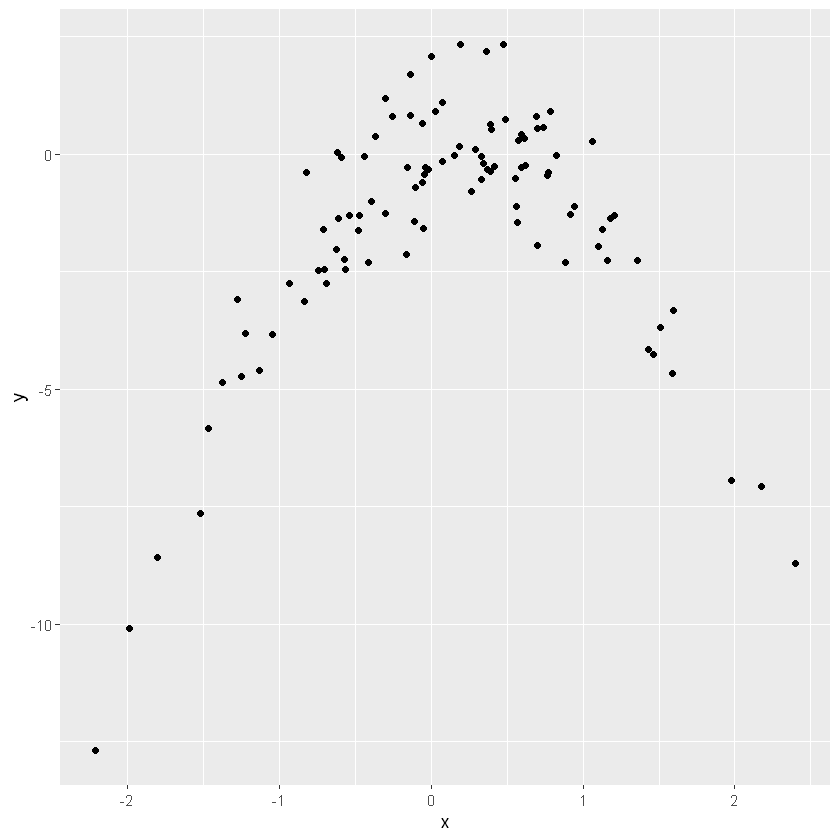

In [83]:
#Exercise 8B: Create a scatterplot of X against Y
library(ggplot2)
ggplot(mapping = aes(x, y)) + 
geom_point() 

#Observation: there is a quadratic relationship between x and y

In [84]:
#Exercise 8C: Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares
#Exercises 8Ci: Y = β0 + β1X + ǫ
library(boot)

set.seed(1)
Locdata <- data.frame(x, y)
fit.glm.01 <- glm(y ~ x)
round(cv.glm(Locdata, fit.glm.01)$delta[1], 3)

#Exercise 8Cii: Y = β0 + β1X + β2X2 + ǫ
fit.glm.02<- glm(y ~ poly(x, 2))
round(cv.glm(Locdata, fit.glm.02)$delta[1], 3)

#Exercise 8Ciii: Y = β0 + β1X + β2X2 + β3X3 + ǫ
fit.glm.03 <- glm(y ~ poly(x, 3))
round(cv.glm(Locdata, fit.glm.03)$delta[1], 3)

#Exercise 8Civ:Y = β0 + β1X + β2X2 + β3X3 + β4X4 + ǫ
fit.glm.04 <- glm(y ~ poly(x, 4))
round(cv.glm(Locdata, fit.glm.04)$delta[1], 3)

#Exercise 8D: Repeat (c) using another random seed, and report your results
#First Exercise 8ci:
set.seed(20)
fit.glm.01 <- glm(y ~ x)
round(cv.glm(Locdata, fit.glm.01)$delta[1], 3)

#Second Exercise 8cii:
fit.glm.02 <- glm(y ~ poly(x, 2))
round(cv.glm(Locdata, fit.glm.02)$delta[1],3)

#Third Exercise 8ciiii:
fit.glm.03 <- glm(y ~ poly(x, 3))
round(cv.glm(Locdata, fit.glm.03)$delta[1], 3)

#Fourth  Exercise 8civ:
fit.glm.04 <- glm(y ~ poly(x, 4))
round(cv.glm(Locdata, fit.glm.04)$delta[1], 3)

#Observations:
#They are both the same results. However, LOOCV evaluates n folds of each observations.

[1] 7.288

[1] 0.937

[1] 0.957

[1] 0.954

[1] 7.288

[1] 0.937

[1] 0.957

[1] 0.954

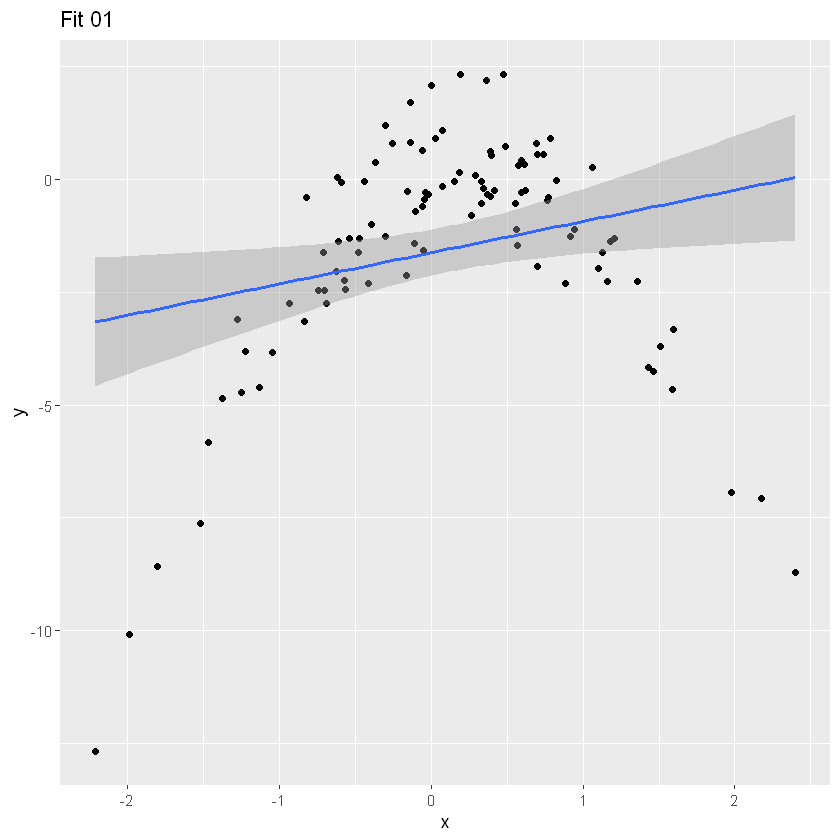

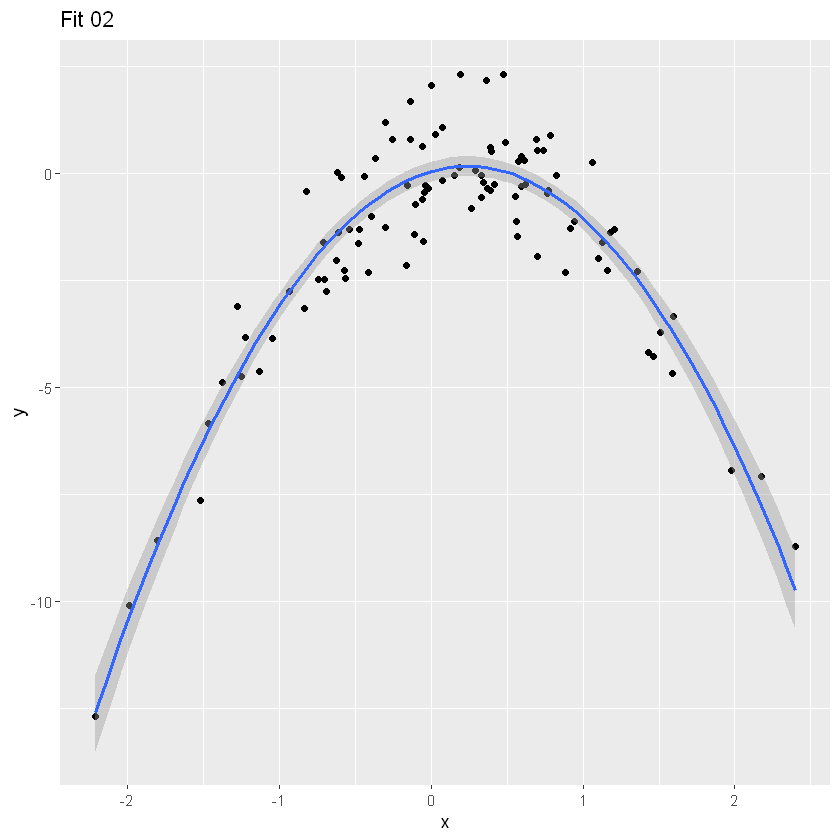

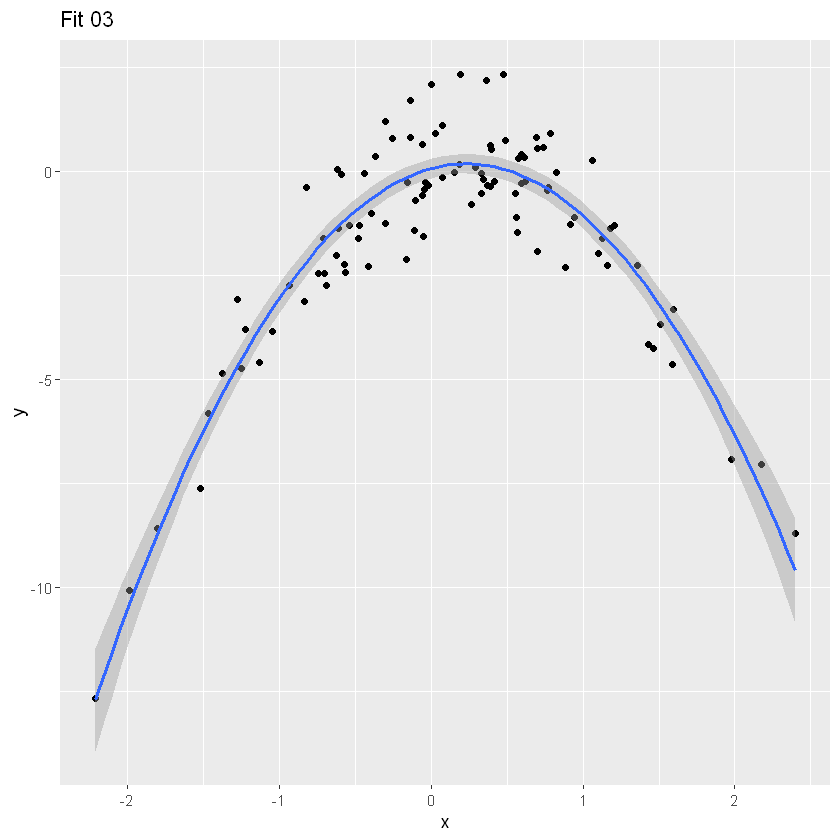

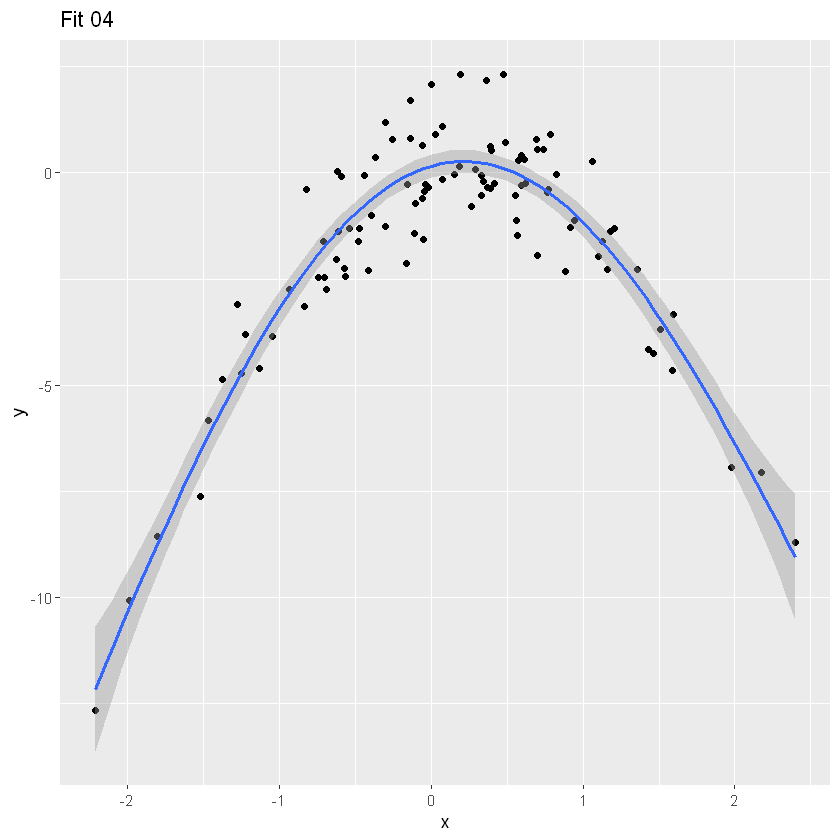

In [85]:
#Exercise 8E: Which of the models in (c) had the smallest LOOCV error?
graph1 <- ggplot(mapping = aes(x, y)) + 
geom_point() +
geom_smooth(method = glm, formula = "y ~ x") + 
ggtitle("Fit 01")
graph1

graph2 <- ggplot(mapping = aes(x, y)) + 
geom_point() +
geom_smooth(method = glm, formula = "y ~ poly(x, 2)") +
ggtitle("Fit 02")
graph2

graph3 <- ggplot(mapping = aes(x, y)) + 
geom_point() +
geom_smooth(method = glm, formula = "y ~ poly(x, 3)") +
ggtitle("Fit 03")
graph3

graph4 <- ggplot(mapping = aes(x, y)) + 
geom_point() +
geom_smooth(method = glm, formula = "y ~ poly(x, 4)") +
ggtitle("Fit 04")
graph4

#Observation:Although the quadratic model has the smallest LOOCV error, the second, third, and fourth order polynomial fits perform slightly differently.

In [86]:
#Exercise 8F: Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares.
#Exercise 8Fi: Y=β0+β1X+ϵ
summary(fit.glm.01)

#Exercise 8Fii: Y = β0 + β1X + β2X2 + ǫ
summary(fit.glm.02)

#Exercise 8Fiii: Y = β0 + β1X + β2X2 + β3X3 + ǫ
summary(fit.glm.03)

#Exercise 8Fiv: Y = β0 + β1X + β2X2 + β3X3 + β4X4 + ǫ
summary(fit.glm.04)

#Observation: 
#The p-values show that the linear and quadratic terms are statistically significant, but the cubic and fourth degree terms are not.

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


Call:
glm(formula = y ~ x)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.5161  -0.6800   0.6812   1.5491   3.8183  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.6254     0.2619  -6.205 1.31e-08 ***
x             0.6925     0.2909   2.380   0.0192 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 6.760719)

    Null deviance: 700.85  on 99  degrees of freedom
Residual deviance: 662.55  on 98  degrees of freedom
AIC: 478.88

Number of Fisher Scoring iterations: 2



Call:
glm(formula = y ~ poly(x, 2))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9650  -0.6254  -0.1288   0.5803   2.2700  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.5500     0.0958  -16.18  < 2e-16 ***
poly(x, 2)1   6.1888     0.9580    6.46 4.18e-09 ***
poly(x, 2)2 -23.9483     0.9580  -25.00  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9178258)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  89.029  on 97  degrees of freedom
AIC: 280.17

Number of Fisher Scoring iterations: 2



Call:
glm(formula = y ~ poly(x, 3))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9765  -0.6302  -0.1227   0.5545   2.2843  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09626 -16.102  < 2e-16 ***
poly(x, 3)1   6.18883    0.96263   6.429 4.97e-09 ***
poly(x, 3)2 -23.94830    0.96263 -24.878  < 2e-16 ***
poly(x, 3)3   0.26411    0.96263   0.274    0.784    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9266599)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  88.959  on 96  degrees of freedom
AIC: 282.09

Number of Fisher Scoring iterations: 2



Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, 4)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, 4)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, 4)3   0.26411    0.95905   0.275    0.784    
poly(x, 4)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2


Chapter 6 Exercise 1: We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain p + 1 models, containing 0, 1, 2, . . . , p predictors. Explain your answers
Exercise 1A: Which of the three models with k predictors has the smallest training RSS?
The model with ideal feature selection method will indeed produce better results, though forward and backward stepwise selection can result in the same model.  It is because best subset classification will fit all 2p different models using the p predictors,  if the selection process is significantly reducing the training RSS, there really is no sub group of predictor variables that could be defined by forward/backward selection

Exercise 1B: Which of the three models with k predictors has the smallest test RSS?
The best subset sampling is more likely to outperform other subsets. All three algorithms will utilize a range of significantly reducing the training RSS so as to  select between modeling techniques of the same size, guided through using cross-validated prediction error or even some sort of penalized statistic (e.g. AIC, BIC, Adjusted R2) to select the final model from the p+1 candidate models.

Exercise 1C:True or False:
i. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-
variable model identified by forward stepwise selection.
Answer: True. The model with (k+1) predictors is created by adding one predictor to the predictor variables with k predictors.

ii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)-
variable model identified by backward stepwise selection.
Answer:True. By trying to remove one predictor from the model with (k+1) predictor variables, the model with k predictors is obtained.

iii. The predictors in the k-variable model identified by backward
stepwise are a subset of the predictors in the (k + 1)-variable model identified by forward stepwise selection.
Answer:False. Forward and backward stepwise selection begin at different points and follow different paths. 

iv. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)
-variable model identified by backward stepwise selection.
Answer:False. There is no direct relationship between the models obtained through forward and backward selection.

v. The predictors in the k-variable model identified by best subset are a subset of the predictors in the (k + 1)-variable
model identified by best subset selection.
Answer:False. The model with (k+1) predictors is obtained by making a choice from among all possible models with (k+1) predictors, and thus does not necessarily include all of the predictor variables preselected for the k-variable model.

In [87]:
#Exercise 9:In this exercise, we will predict the number of applications received using the other variables in the College data set.
#Exercise 9A:Split the data set into a training set and a test set.
library(ISLR)
data(College)

set.seed(10)
train = sample(1:dim(College)[1], dim(College)[1] / 2)
test <- -train

College.train <- College[train, ]
College.test <- College[test, ]

In [88]:
#Exercise 9B:Fit a linear model using least squares on the training set, and report the test error obtained.
fit.lm01 <- lm(Apps ~ ., data = College.train)
pred.lm01 <- predict(fit.lm01, College.test)
mean((pred.lm01 - College.test$Apps)^2)

#Test MSE is 1.020099*10^6

[1] 1020100

In [89]:
#Exercise 9C: Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.
library(glmnet)
train.model <- model.matrix(Apps ~ ., data = College.train)
test.model <- model.matrix(Apps ~ ., data = College.test)
grid <- 10 ^ seq(4, -2, length = 100)
fit.ridged <- glmnet(train.model, College.train$Apps, alpha = 0, lambda = grid, thresh = 1e-12)
cv.ridged <- cv.glmnet(train.model, College.train$Apps, alpha = 0, lambda = grid, thresh = 1e-12)
bestam.ridged <- cv.ridged$lambda.min
bestam.ridged

pred.ridged <- predict(fit.ridge, s = bestam.ridged, newx = test.model)
mean((pred.ridged - College.test$Apps)^2)

#MSE is higher for ridge regression

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] 0.01

[1] 1020090

In [90]:
#Exercise 9D:Fit a lasso model on the training set, with λ chosen by cross validation.Report the test error obtained, along with the number of non-zero coefficient estimates.
fitted.lasso <- glmnet(train.model, College.train$Apps, alpha = 1, lambda = grid, thresh = 1e-12)
cv.lasso <- cv.glmnet(train.model, College.train$Apps, alpha = 1, lambda = grid, thresh = 1e-12)
bestam.lasso <- cv.lasso$lambda.min
bestam.lasso

predicted.lasso <- predict(fitted.lasso, s = bestam.lasso, newx = test.model)
mean((predicted.lasso - College.test$Apps)^2)

predict(fitted.lasso, s = bestam.lasso, type = "coefficients")

#MSE is higher than ridge regression

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] 0.01

[1] 1020097

19 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -629.58395718
(Intercept)    .         
PrivateYes  -647.53846353
Accept         1.68906292
Enroll        -1.02324702
Top10perc     48.18302370
Top25perc    -10.50909239
F.Undergrad    0.01982727
P.Undergrad    0.04214021
Outstate      -0.09488417
Room.Board     0.14547537
Books          0.06661918
Personal       0.05663252
PhD          -10.11314460
Terminal      -2.29132336
S.F.Ratio     22.06683385
perc.alumni    2.07798052
Expend         0.07653891
Grad.Rate      9.99638694

[1] 1422699

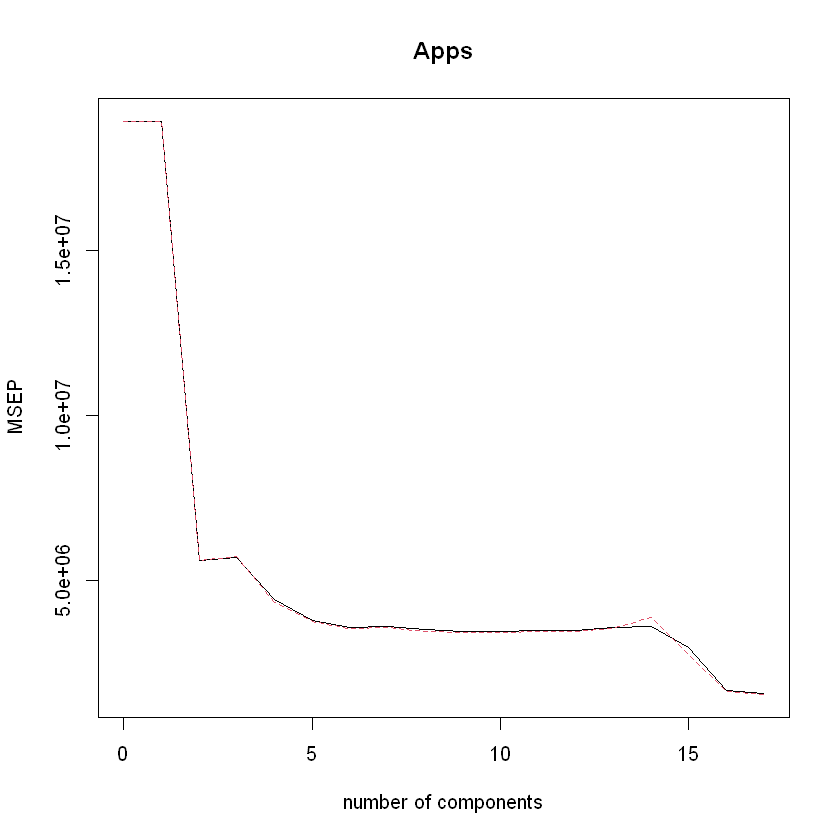

In [91]:
#Exercise 9E:Fit a PCR model on the training set, with M chosen by cross validation.
library(pls)

fitted.pcr <- pcr(Apps ~ ., data = College.train, scale = TRUE, validation = "CV")
validationplot(fitted.pcr, val.type = "MSEP")

predicted.pcr <- predict(fitted.pcr, College.test, ncomp = 10)
mean((predicted.pcr - College.test$Apps)^2)

#MSE is higher in pcr

[1] 1029442

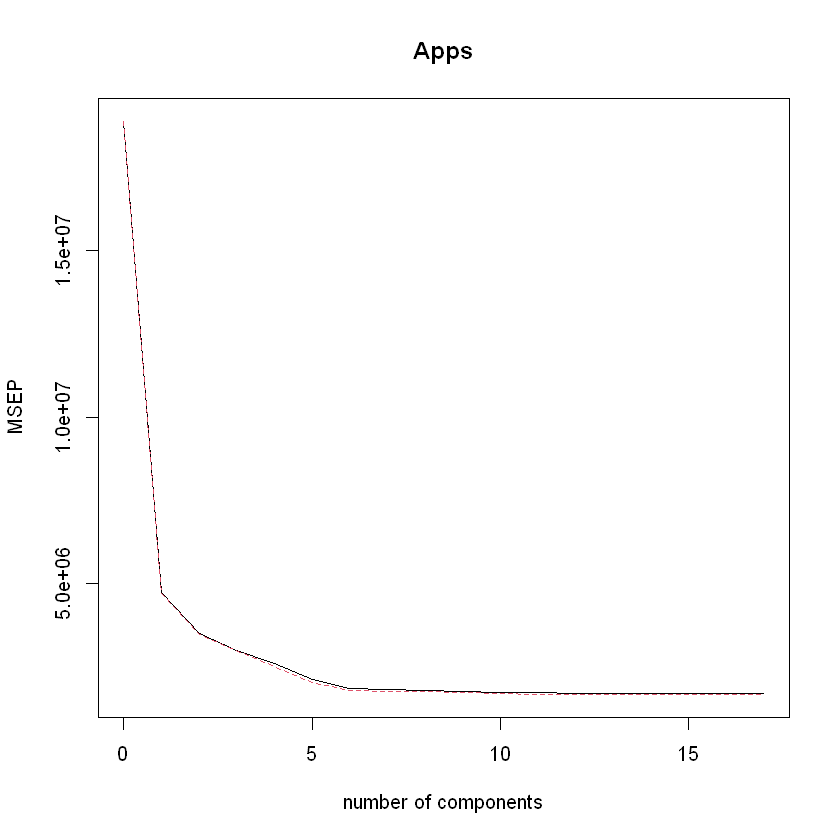

In [92]:
#Exercise 9F:Fit a PLS model on the training set, with M chosen by crossvalidation.
fitted.pls <- plsr(Apps ~ ., data = College.train, scale = TRUE, validation = "CV")
validationplot(fitted.pls, val.type = "MSEP")

predicted.pls <- predict(fitted.pls, College.test, ncomp = 10)
mean((predicted.pls - College.test$Apps)^2)

#MSE is lower for PLS

In [93]:
#Exercise 9G: Comment on the results obtained. How accurately can we predict the number of college applications received?
test.average <- mean(College.test$Apps)
lm.R2 <- 1 - mean((pred.lm01 - College.test$Apps)^2) / mean((test.average - College.test$Apps)^2)
lm.R2
ridge.R2 <- 1 - mean((pred.ridged - College.test$Apps)^2) / mean((test.average - College.test$Apps)^2)
ridge.R2
lasso.R2 <- 1 - mean((predicted.lasso - College.test$Apps)^2) / mean((test.average - College.test$Apps)^2)
lasso.R2
pcr.R2 <- 1 - mean((predicted.pcr - College.test$Apps)^2) / mean((test.average - College.test$Apps)^2)
pcr.R2
pls.R2 <- 1 - mean((predicted.pls - College.test$Apps)^2) / mean((test.average - College.test$Apps)^2)
pls.R2
#All models except PCR predict high college application accuracy.

[1] 0.9076134

[1] 0.9076143

[1] 0.9076137

[1] 0.8711516

[1] 0.9067674

Chapter 7 Exercise 9:This question uses the variables dis (the weighted mean of distances to five Boston employment centers) and nox (nitrogen oxides concentration in parts per 10 million) from the Boston data.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5



Call:
lm(formula = nox ~ poly(dis, 3, raw = T), data = Bos)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.9341281  0.0207076  45.110  < 2e-16 ***
poly(dis, 3, raw = T)1 -0.1820817  0.0146973 -12.389  < 2e-16 ***
poly(dis, 3, raw = T)2  0.0219277  0.0029329   7.476 3.43e-13 ***
poly(dis, 3, raw = T)3 -0.0008850  0.0001727  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


Warning message:
"Computation failed in `stat_smooth()`:
object 'nox' not found"


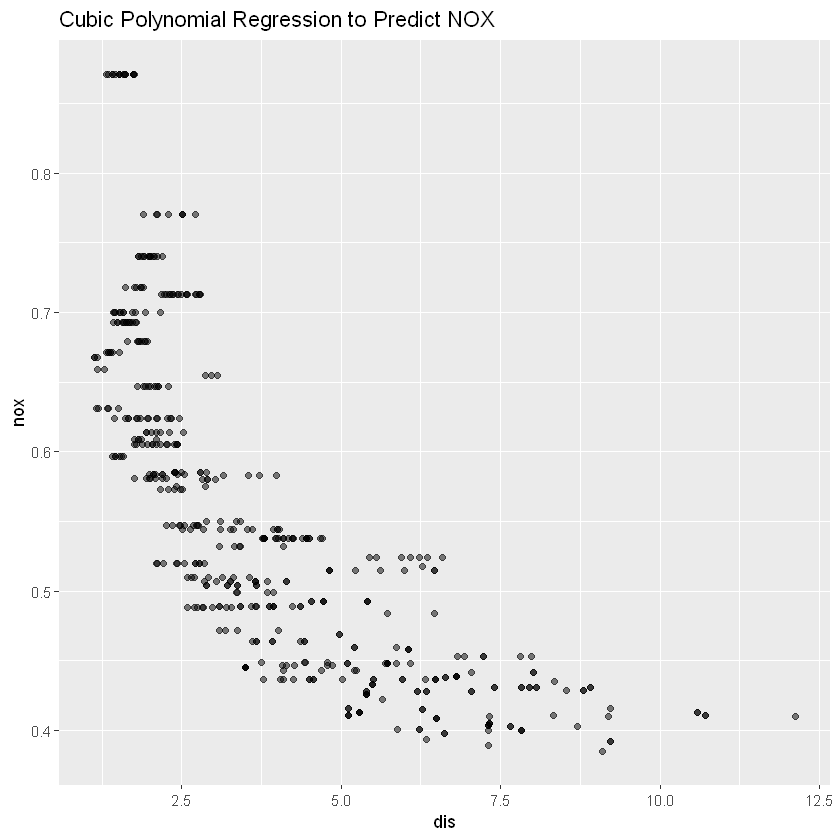

In [113]:
#Exercise 9A:Use the poly() function to fit a cubic polynomial regression to predict nox using dis
library(ISLR)
library(MASS)

Bos <- data.frame(Boston)
Bos
mod <- lm(nox ~ poly(dis, 3, raw = T), data = Bos)
summary(mod)

ggplot(Bos, aes(x = dis, y = nox)) + 
geom_point(alpha = 0.5) + 
geom_smooth(method = lm, formula = "nox ~ poly(dis, 3, raw = T)") + 
ggtitle("Cubic Polynomial Regression to Predict NOX")

#The end of the graph points will not fit into a curve

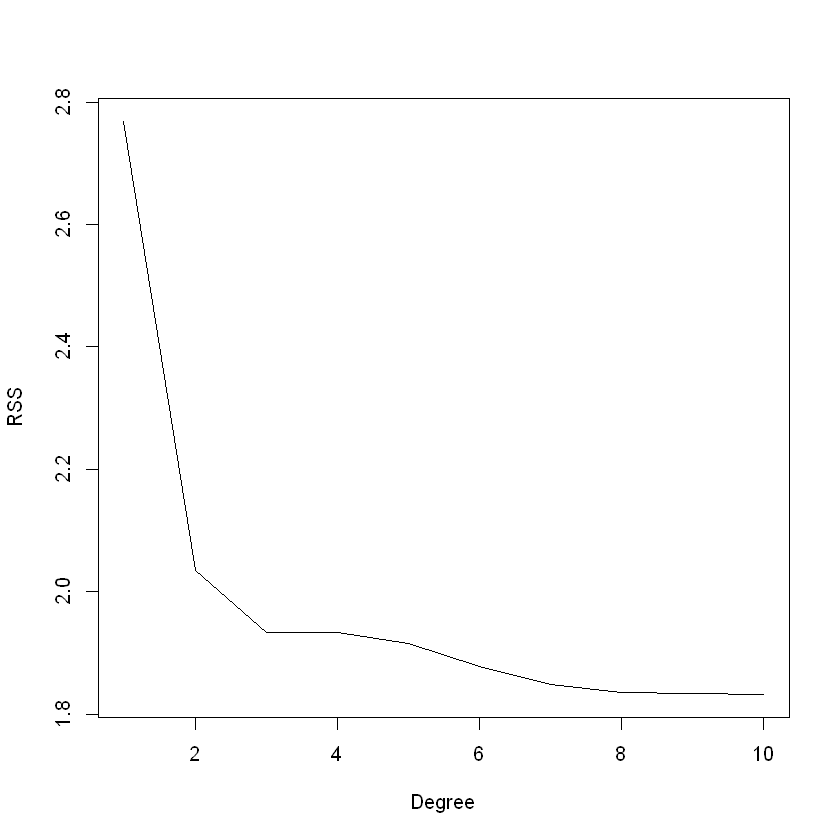

In [115]:
#Exercise 9B:Plot the polynomial fits for a range of different polynomial degrees (say, from 1 to 10), and report the associated residual sum of squares.
polyfit <- rep(NA, 10)
for (i in 1:10) {
    fitted <- lm(nox ~ poly(dis, i), data = Bos)
    polyfit[i] <- sum(fitted$residuals^2)}

plot(1:10, polyfit, xlab = "Degree", ylab = "RSS", type = "l")

#RSS decreases with degree of polymonials with a minimum degree of 10.

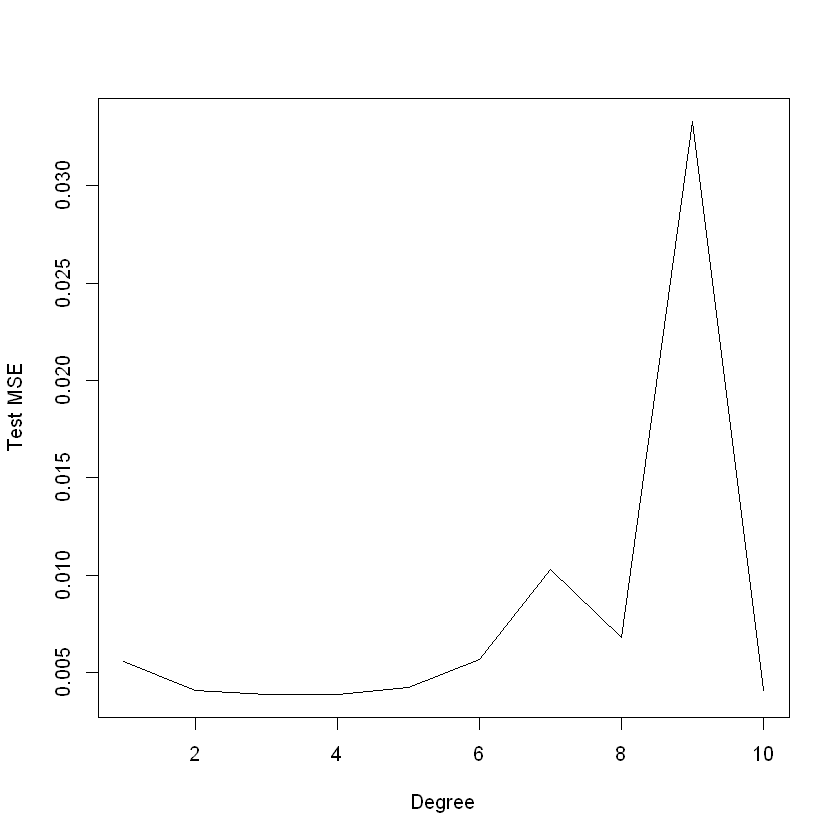

In [116]:
#Exercise 9C:Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results.
crossval <- rep(NA, 10)
for (i in 1:10) {
    fitted <- glm(nox ~ poly(dis, i), data = Bos)
    crossval [i] <- cv.glm(Bos, fitted, K = 10)$delta[1]
}
plot(1:10, crossval , xlab = "Degree", ylab = "Test MSE", type = "l")

#From degree of 4 the polynomial minimizes Test MSE.


Call:
lm(formula = nox ~ splines::bs(Bos$dis, knots = c(4, 7, 11)), 
    data = Bos)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.124567 -0.040355 -0.008702  0.024740  0.192920 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                                 0.73926    0.01331  55.537  < 2e-16
splines::bs(Bos$dis, knots = c(4, 7, 11))1 -0.08861    0.02504  -3.539  0.00044
splines::bs(Bos$dis, knots = c(4, 7, 11))2 -0.31341    0.01680 -18.658  < 2e-16
splines::bs(Bos$dis, knots = c(4, 7, 11))3 -0.26618    0.03147  -8.459 3.00e-16
splines::bs(Bos$dis, knots = c(4, 7, 11))4 -0.39802    0.04647  -8.565  < 2e-16
splines::bs(Bos$dis, knots = c(4, 7, 11))5 -0.25681    0.09001  -2.853  0.00451
splines::bs(Bos$dis, knots = c(4, 7, 11))6 -0.32926    0.06327  -5.204 2.85e-07
                                              
(Intercept)                                ***
splines::bs(Bos$dis, knots = c(4, 7, 11))1 ***
spli

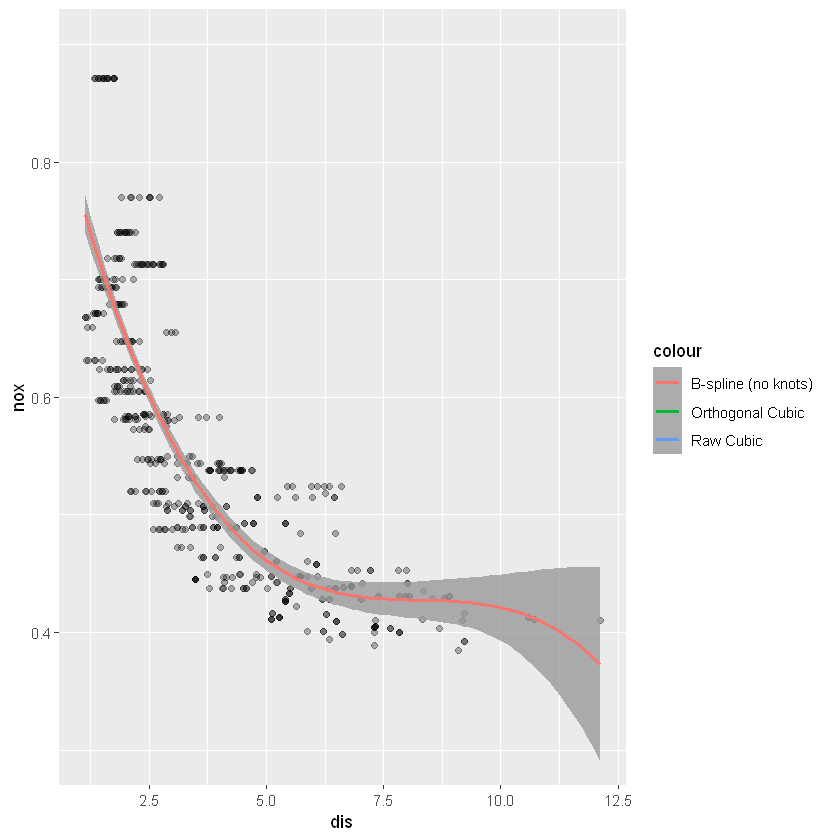

In [146]:
#Exercise 9D:Use the bs() function to fit a regression spline to predict nox using dis.
library(gam)
fitted <- lm(nox ~ splines::bs(Bos$dis, knots = c(4, 7, 11)), data = Bos)
summary(fitted)

ggplot(Bos, aes(x = dis, y = nox)) + 
  geom_vline(xintercept = attr(bs(Bos$dis, df = 3),"knots"), col = "darkblue", linetype = "twodash") +
  geom_point(alpha = 0.3) + 
  geom_smooth(method = "lm", formula = "y ~ poly(x, 3)", aes(col = "Orthogonal Cubic")) + 
  geom_smooth(method = "lm", formula = "y ~ poly(x, 3, raw = T)", aes(col = "Raw Cubic")) + 
  geom_smooth(method = "lm", formula = "y ~ bs(x, df = 3)", aes(col = "B-spline (no knots)")) +
  coord_cartesian(ylim = c(0.3, 0.9)) 


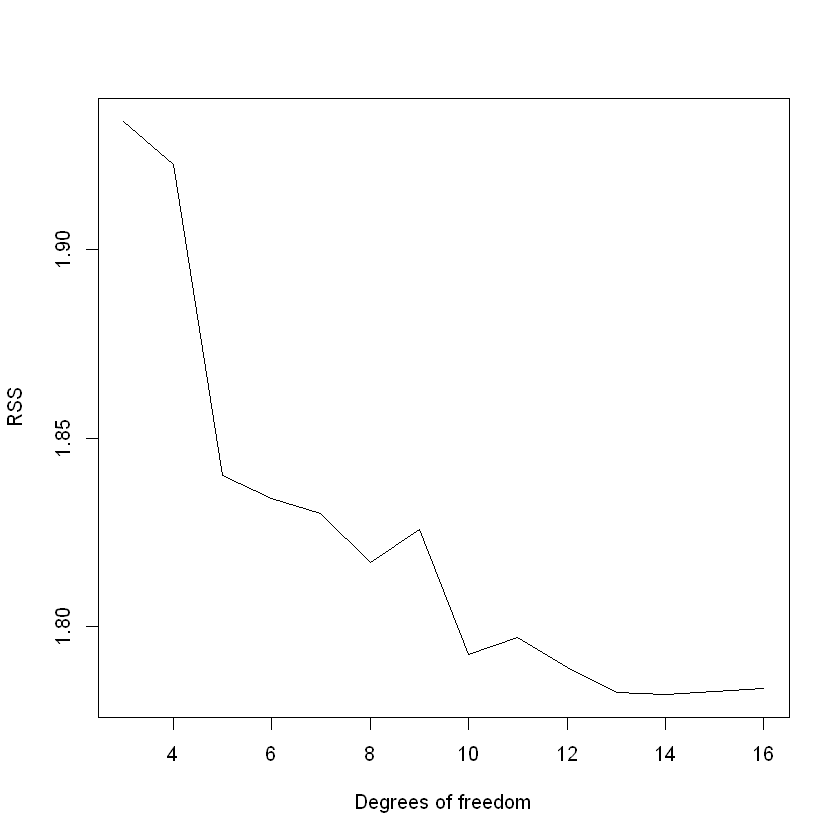

In [148]:
#Exercise 9E: Now fit a regression spline for a range of degrees of freedom, and plot the resulting fits and report the resulting RSS.
RSSRes <- rep(NA, 16)
for (i in 3:16) {
    fitted <- lm(nox ~ bs(dis, df = i), data = Bos)
    RSSRes[i] <- sum(fitted$residuals^2)}
plot(3:16, RSSRes[-c(1, 2)], xlab = "Degrees of freedom", ylab = "RSS", type = "l")

#RSS decreases over the degrees of freedom but at 14 it starts to increase

In [164]:
#Exercise 9F:Perform cross-validation or another approach in order to select the best degrees of freedom for a regression spline on this data.
library(dplyr)
set.seed(2)
cv <- 1
for (i in 3:12) {
    fit <- glm(nox ~ bs(dis, df = i), data = Bos)
    cv[i] <- cv.glm(Bos, fitted, K = 10)$delta[1]
    
}

plot(3:16, cv[-c(1, 2)],xlab = "Degrees of freedom", ylab = "Test MSE", type = "l", ylim = c(0.4, 0.84))
#The minimum cross validation is at 10 degrees

Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.2157), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.2157), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.19095), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.19095), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning 

In [180]:
#Exercise 10:This question relates to the College data set.
#Exercise 10A: Split the data into a training set and a test set.
library(leaps)
library(caret)
library(Metrics)
set.seed(5)
trainindex <- sample(1:nrow(College), round(nrow(College) * 0.7))
trained <- College[trainindex, ]
nrow(trained) / nrow(College)

tested <- College[-trainindex, ]
nrow(tested) / nrow(College)

rmsleMetrics <- function(data, lev = NULL, model = NULL){
    out <- Metrics::rmsle(data$obs, data$pred)
    names(out) <- c("rmsle")
    return (out)
}

control <- trainControl(method = "repeatedcv", 
                     number = 10, 
                     repeats = 1, 
                     summaryFunction = rmsleMetrics, 
                     selectionFunction = "oneSE")

set.seed(15)

modelward <- train(Outstate ~ .,
                       data = trained,
                       method = "leapForward",
                       metric = "MSE",
                       maximize = F,
                       trControl = control,
                       tuneGrid = data.frame(nvmax = 1:17))
modelward

library(leaps)
set.seed(2)
attach(College)

train <- sample(length(Outstate), length(Outstate) / 2)
test <- -train
College.trained <- College[train, ]
College.tested <- College[test, ]
fitted <- regsubsets(Outstate ~ ., data = College.trained, nvmax = 17, method = "forward")
fit.summary <- summary(fitted)
par(mfrow = c(1, 3))
plot(fit.summary$cp, xlab = "Variables", ylab = "Cp", type = "l")
min.cp <- min(fit.summary$cp)
std.cp <- sd(fit.summary$cp)
abline(h = min.cp + 0.2 * std.cp, col = "blue", lty = 2)
abline(h = min.cp - 0.2 * std.cp, col = "blue", lty = 2)
plot(fit.summary$bic, xlab = "Variables", ylab = "BIC", type='l')
min.bic <- min(fit.summary$bic)
std.bic <- sd(fit.summary$bic)
abline(h = min.bic + 0.2 * std.bic, col = "blue", lty = 2)
abline(h = min.bic - 0.2 * std.bic, col = "blue", lty = 2)
plot(fit.summary$adjr02, xlab = "Variables", ylab = "R2", type = "l", ylim = c(0.4, 0.84))
max.adjr02 <- max(fit.summary$adjr02)
std.adjr02 <- sd(fit.summary$adjr02)
abline(h = max.adjr02 + 0.2 * std.adjr02, col = "blue", lty = 2)
abline(h = max.adjr02 - 0.2 * std.adjr02, col = "blue", lty = 2)

[1] 0.7001287

[1] 0.2998713

Warning message in train.default(x, y, weights = w, ...):
"The metric "MSE" was not in the result set. rmsle will be used instead."


Linear Regression with Forward Selection 

544 samples
 17 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 491, 490, 491, 489, 491, 489, ... 
Resampling results across tuning parameters:

  nvmax  rmsle    
   1     0.3013617
   2     0.2505721
   3     0.2329073
   4     0.2298363
   5     0.2304827
   6     0.2197898
   7     0.2217847
   8     0.2194695
   9     0.2199638
  10     0.2227089
  11     0.2229851
  12     0.2213640
  13     0.2199621
  14     0.2193924
  15     0.2192868
  16     0.2203517
  17     0.2206354

rmsle was used to select the optimal model using  the one SE rule.
The final value used for the model was nvmax = 6.

(Intercept)    PrivateYes    Room.Board      Terminal   perc.alumni 
-4076.6423909  2674.1428158     0.8838813    38.9978045    45.4468606 
       Expend     Grad.Rate 
    0.2421753    35.2735430

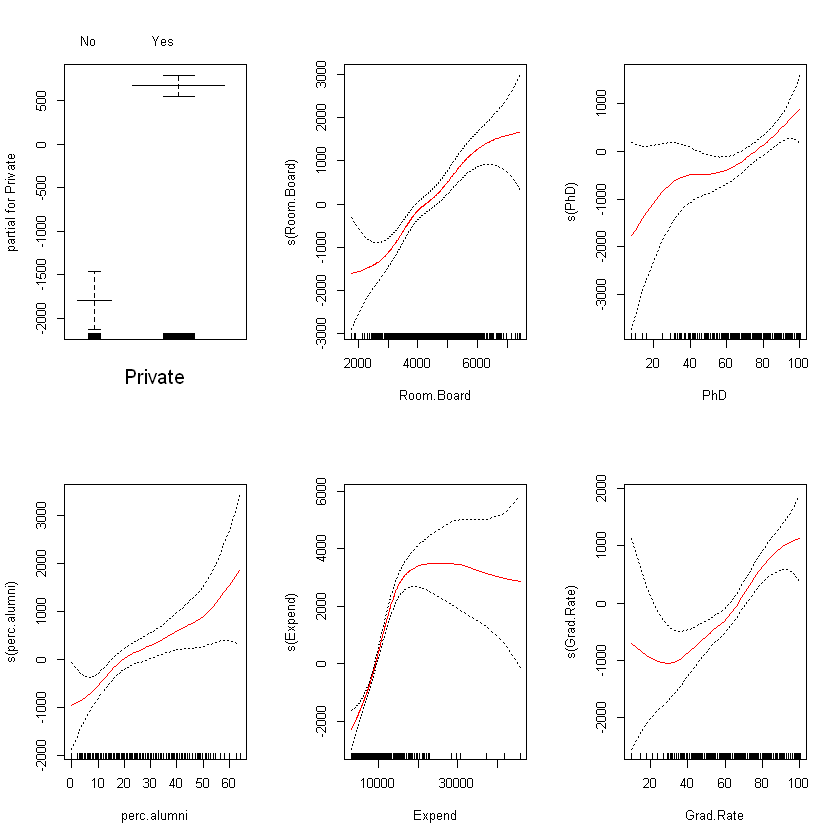

In [191]:
#Exercise 10B:Fit a GAM on the training data, using out-of-state tuition as the response and the features selected in the previous step as the predictors.
coef(modelward$finalModel, id = 6)

model1 <- gam(Outstate ~ Private + s(Room.Board) + s(PhD) + s(perc.alumni) + s(Expend) + s(Grad.Rate), data = trained)
par(mfrow = c(2, 3))
plot(model1, se = T, col = "red")


In [196]:
#Exercise 10C: Evaluate the model obtained on the test set, and explain the results obtained.
mean((predict(model1, newdata = tested) - tested$Outstate)^2)

testedTSS <- sum((tested$Outstate - mean(tested$Outstate))^2)
testedRSS <- sum((predict(model1, newdata = tested) - tested$Outstate)^2)
1 - testedRSS/testedTSS

mean((predict(modelward, newdata = tested) - tested$Outstate)^2)
testedRSS <- sum((predict(modelward, newdata = tested) - tested$Outstate)^2)
1 - testedRSS/testedTSS

#GAM has the best performance for test as there isn't any nonlinear relationship

[1] 3513842

[1] 0.798238

[1] 4345196

[1] 0.7505024

In [197]:
#Exercise 10D: For which variables, if any, is there evidence of a non-linear relationship with the response?
summary(model1)
model2 <- gam(Outstate ~ Private + s(Room.Board) + PhD + perc.alumni + s(Expend) + Grad.Rate, data = trained)
mean((predict(model2, newdata = tested) - tested$Outstate)^2)

testedRSS <- sum((predict(model2, newdata = tested) - tested$Outstate)^2)
1 - testedRSS/testedTSS

model3 <- gam(Outstate ~ Private + s(Room.Board) + PhD + perc.alumni + Expend + Grad.Rate, data = trained)
mean((predict(model3, newdata = tested) - tested$Outstate)^2)
testedRSS <- sum((predict(model3, newdata = tested) - tested$Outstate)^2)
1 - testedRSS/testedTSS


Call: gam(formula = Outstate ~ Private + s(Room.Board) + s(PhD) + s(perc.alumni) + 
    s(Expend) + s(Grad.Rate), data = trained)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-7392.22 -1127.04    26.61  1269.44  4468.88 

(Dispersion Parameter for gaussian family taken to be 3476500)

    Null Deviance: 8500800916 on 543 degrees of freedom
Residual Deviance: 1814732424 on 521.9998 degrees of freedom
AIC: 9760.824 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
                Df     Sum Sq    Mean Sq F value    Pr(>F)    
Private          1 2360650553 2360650553 679.031 < 2.2e-16 ***
s(Room.Board)    1 1636171079 1636171079 470.637 < 2.2e-16 ***
s(PhD)           1  685004075  685004075 197.038 < 2.2e-16 ***
s(perc.alumni)   1  336233748  336233748  96.716 < 2.2e-16 ***
s(Expend)        1  567967331  567967331 163.373 < 2.2e-16 ***
s(Grad.Rate)     1  123587495  123587495  35.549 4.584e-09 ***
Residuals      522 1814732424    3476500        

[1] 3533104

[1] 0.797132

[1] 4341053

[1] 0.7507402